In [1]:
using Gadfly, Interact

#  Colors used for plotting, based on Color Brewer 3class Set 1
blue = colorant"#377eb8"; 

# Frequency range
ω=logspace(-2,6,1000);
j=im;

# Default style for plotting
set_default_plot_size(20cm, 15cm);
properties=(Geom.line, Scale.x_log10, Guide.XLabel("Frequency (rad/s)"), Theme(line_width=2pt, default_color=blue), Guide.xticks(ticks=collect(-2:5)));
propertiesMagnitude=(properties..., Guide.YLabel("|H(jω)| (dB)", orientation=:vertical),      Coord.Cartesian(ymin=-40, ymax=20));
propertiesPhase    =(properties..., Guide.YLabel("Phase H(jω) (rad)", orientation=:vertical), Coord.Cartesian(ymin=-pi, ymax=pi), Guide.yticks(ticks=[-pi,-pi/2,0,pi/2,pi]), Scale.y_continuous(labels=y->@sprintf("%0.2f",y)));
zoom = Coord.Cartesian(xmin=1,xmax=3);


  likely near /home/adityam/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /home/adityam/.julia/v0.4/Interact/src/IJulia/setup.jl:157
 in depwarn at ./deprecated.jl:73
while loading /home/adityam/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1


In [2]:
function BodePlot(H; extras=Coord.Cartesian(xmin=-2,xmax=6))
    magnitude = 20log10(abs(H))
    phase     = angle(H)
    
    
    magnitudePlot = plot(x=ω, y=magnitude,propertiesMagnitude...,extras)
    phasePlot     = plot(x=ω, y=phase,  propertiesPhase...,extras)
    
    vstack(magnitudePlot, phasePlot)
    
end

BodePlot (generic function with 1 method)

### Poles

Consider a transfer function 

$$
        H(j\omega) = \frac{1}{\displaystyle 1 + j\left(\frac{ \omega }{a}\right)}
$$
which has a pole at $-a$

Interact.Options{:ToggleButtons,Int64}([Reactive.Input{Int64}] 10,"a",10,"10",Interact.OptionDict(Any["10","100","1000","10000","100000"],Dict{Any,Any}("1000"=>1000,"100000"=>100000,"10"=>10,"10000"=>10000,"100"=>100)),Any[],Any[])

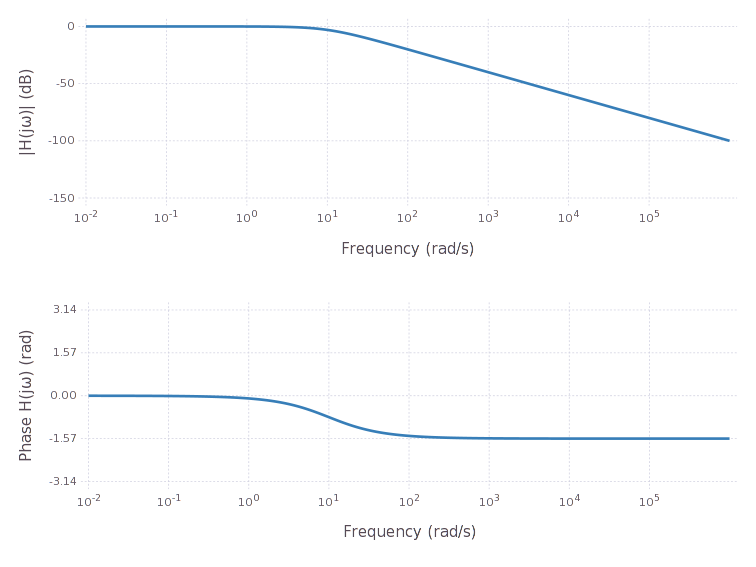

In [3]:
@manipulate for a in round(Int64,logspace(1,5,5))
    H = 1 ./ (1 + j*ω./a);
    # BodePlot(H; extras=zoom)    
    BodePlot(H)    
end

### Zeros

Consider a transfer function 

$$
        H(j\omega) = \displaystyle 1 + j\left(\frac{ \omega }{a}\right)
$$
which has a zero at $-a$

Interact.Options{:ToggleButtons,Int64}([Reactive.Input{Int64}] 10,"a",10,"10",Interact.OptionDict(Any["10","100","1000","10000","100000"],Dict{Any,Any}("1000"=>1000,"100000"=>100000,"10"=>10,"10000"=>10000,"100"=>100)),Any[],Any[])

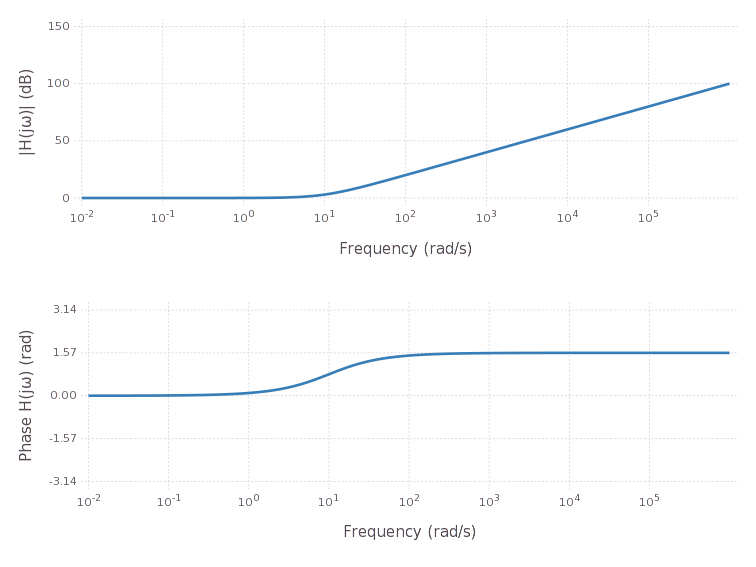

In [4]:
@manipulate for a in round(Int64,logspace(1,5,5))
    H = (1 + j*ω./a);
    # BodePlot(H; extras=zoom) 
    BodePlot(H)
end

### Complex conjugate poles
$$
\frac {1} {\displaystyle 1 + 2\zeta j\left(\frac{\omega}{\omega_n}\right) + \left(\frac{j\omega}{\omega_n}\right)^2}
$$

Interact.Options{:ToggleButtons,Int64}([Reactive.Input{Int64}] 10,"ωₙ",10,"10",Interact.OptionDict(Any["10","100","1000","10000","100000"],Dict{Any,Any}("1000"=>1000,"100000"=>100000,"10"=>10,"10000"=>10000,"100"=>100)),Any[],Any[])

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.5,"ζ",0.5,0.0:0.01:1.1)

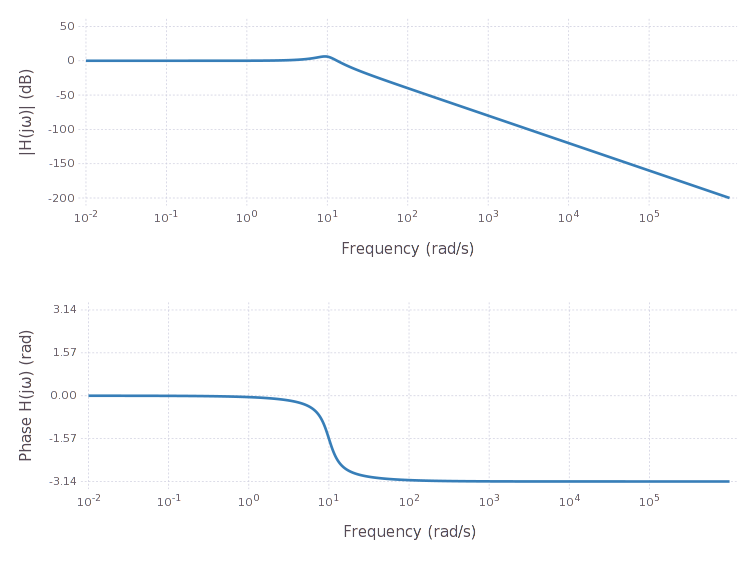

In [3]:
@manipulate for ωₙ in round(Int64,logspace(1,5,5)), ζ in slider(0:0.01:1.1, value=0.5, label="ζ")
    H = 1./(1 + j*ζ*ω./ωₙ + (j*ω./ωₙ).^2);
    #BodePlot(H; extras=zoom) 
    BodePlot(H)
end